##                                                                                                        Author: Anusha Maria Thomas

# THE SPARK FOUNDATION 

### Data Science & Business Analytics Internship Task

## Task 1 - Prediction using Supervised ML
 ● Predict the percentage of an student based on the no. of study hours.   
 ● This is a simple linear regression task as it involves just 2 variables.



### Importing the libraries used in the model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset

In [2]:
path =  "http://bit.ly/w-data"
data = pd.read_csv(path)
print("Data imported")

Data imported


In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Summary of the dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Visualising the data

Boxplot of the data

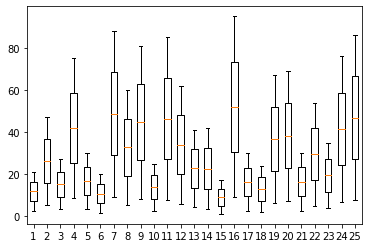

In [6]:
plt.boxplot(data)
plt.show()

A plot of Hours studied vs Score

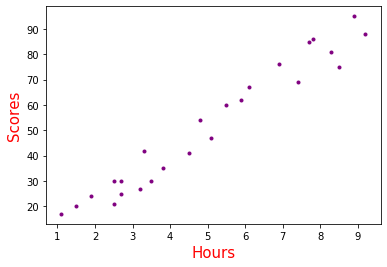

In [7]:
plt.xlabel('Hours',fontsize=15,color='red')
plt.ylabel('Scores',fontsize=15,color='red')
plt.scatter(data.Hours,data.Scores,color='purple',marker='.')
plt.show()

From the above plot, we understand that there is a linear relation between the hours taken to study and the score obtained. 

### Preprocessing the data 


In [8]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values


In [9]:
x


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Splitting the data into training and testing set.

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size=0.3)

The data is split as 30:70, where 30 is for testing and 70 for training the model.

In [12]:
print("x train.shape =", x_train.shape)
print("y train.shape =", y_train.shape)
print("x test.shape  =", x_test.shape)
print("y test.shape  =", y_test.shape)

x train.shape = (17, 1)
y train.shape = (17,)
x test.shape  = (8, 1)
y test.shape  = (8,)


### Training the model using Linear Regression Algorithm

In [13]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [14]:
linreg.fit(x_train,y_train)
print("Training completed")
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)

Training completed
B0 = 2.370815382341881 
B1 = [9.78856669]


##### Plotting the Regression line

In [15]:
y0 = linreg.intercept_ + linreg.coef_*x_train

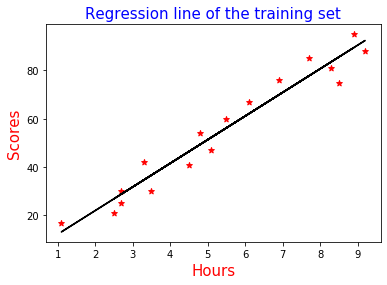

In [16]:
plt.scatter(x_train,y_train,color='red',marker='*')
plt.plot(x_train,y0,color='black')
plt.xlabel("Hours",fontsize=15,color='red')
plt.ylabel("Scores",fontsize=15,color='red')
plt.title("Regression line of the training set",fontsize=15,color='blue')
plt.show()

In [17]:
y_pred=linreg.predict(x_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


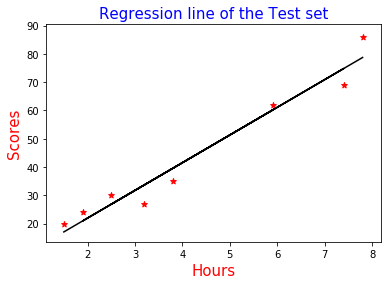

In [18]:
plt.plot(x_test,y_pred,color='black')
plt.scatter(x_test,y_test,color='red',marker='*')
plt.xlabel("Hours",fontsize=15,color='red')
plt.ylabel("Scores",fontsize=15,color='red')
plt.title("Regression line of the Test set",fontsize=15,color='blue')
plt.show()

#### Comparision of the Actual and Predicted Score

In [19]:
y_test1 = list(y_test)
prediction=list(y_pred)
df_compare = pd.DataFrame({ 'Actual':y_test1,'Predicted value':prediction})
df_compare

,Actual,Predicted value
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


##### A plot between the Actual and Predicted Score

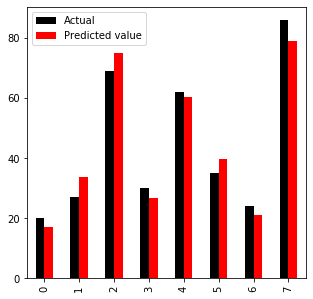

In [20]:
df_compare.plot(kind='bar',figsize=(5,5),color=['black','red'])
plt.show()

#### Training and Testing Accuracy

In [21]:
print("Training Score:",linreg.score(x_train,y_train))
print("Test Score:",linreg.score(x_test,y_pred))

Training Score: 0.9484997422695115
Test Score: 1.0


### Evaluation of the Model

In [22]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [23]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
Root Mean Squared Error: 4.792191274636315


#### R-2 Score

In [24]:
metrics.r2_score(y_test,y_pred)

0.9568211104435257

##### R-2 score predicts the goodness and fit of the model. Since the score is closer to 1, we understand that this is an accurate model.

### Final prediction score

In [25]:
Prediction_score = linreg.predict([[9.25]])
print("No of Hours the student studied = 9.25 Hours")
print("The student will get a score of :",Prediction_score)

No of Hours the student studied = 9.25 Hours
The student will get a score of : [92.91505723]


#### Therefore we have predicted the score of a student, from the no of hours taken to study by using the linear regression algorithm.    